# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 570


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | stanley
Processing Record 3 of Set 1 | susuman
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | huarmey
Processing Record 7 of Set 1 | maragogi
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | kerikeri
Processing Record 10 of Set 1 | cacocum
Processing Record 11 of Set 1 | dausa
Processing Record 12 of Set 1 | lagoa
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | sumbe
Processing Record 16 of Set 1 | fortuna
Processing Record 17 of Set 1 | staunton
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | happy valley-goose bay
Processing Record 20 of Set 1 | papatowai
Processing Record 21 of Set 1 | sungai penuh
Processing Record 22 of Set 1 | dolores
Processing Record 23 of Set 1 |

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [ ]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.82,75,5,11.25,TF,1707700806
1,fontaine-les-dijon,47.3424,5.0201,6.40,93,75,1.03,FR,1707700736
2,iqaluit,63.7506,-68.5145,-26.84,62,40,2.57,CA,1707700807
3,utrik,11.2278,169.8474,25.95,80,100,10.60,MH,1707700809
4,ilulissat,69.2167,-51.1000,-17.99,65,100,4.12,GL,1707700810


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

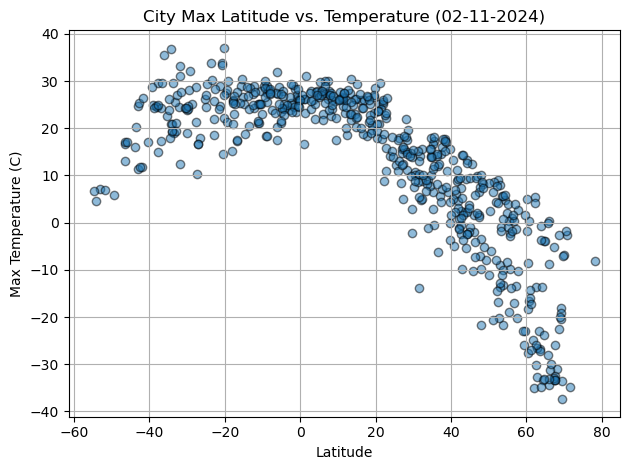

In [ ]:
# Build scatter plot for latitude vs. temperature
import datetime
import matplotlib.pyplot as plt
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], alpha=0.5, edgecolors='black')

# Format date
date = datetime.datetime.now()
date_str = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

plt.title(f"City Max Latitude vs. Temperature ({date_str})")  
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

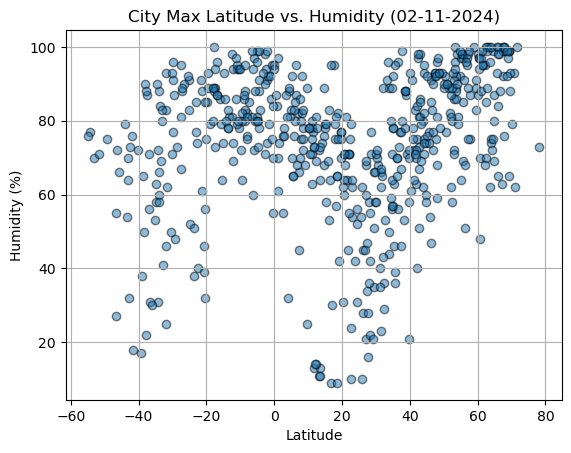

In [ ]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], alpha = 0.5, edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Humidity ({date_str})") 
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

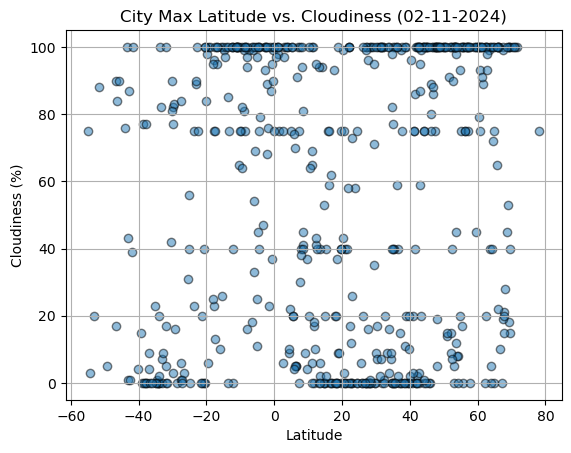

In [ ]:
# Build the scatter plots for latitude vs. cloudines
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], alpha = 0.5, edgecolors='black')


# Inc orporate the other graph properties
plt.title(f"City Max Latitude vs. Cloudiness ({date_str})") 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

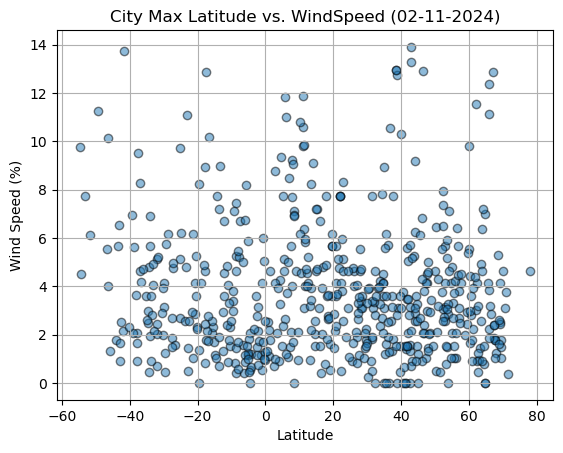

In [ ]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], alpha = 0.5, edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. WindSpeed ({date_str})") 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots    
def linear_regression_plot(x, y, xlabel='', ylabel='', title=''):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.text(0.5, 0.9, line_eq, fontsize=12, ha='center', transform=plt.gca().transAxes, color='red')

    regress_values = x * slope + intercept
    
    # Plot scatter plot
    plt.scatter(x, y)
    
    # Plot regression line
    plt.plot(x, slope*x + intercept, color='red')
      
    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # print the r value
    print(f'The r-value is: {r_value**2}')
    
    # Show plot
    plt.show()

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,fontaine-les-dijon,47.3424,5.0201,6.40,93,75,1.03,FR,1707700736
2,iqaluit,63.7506,-68.5145,-26.84,62,40,2.57,CA,1707700807
3,utrik,11.2278,169.8474,25.95,80,100,10.60,MH,1707700809
4,ilulissat,69.2167,-51.1000,-17.99,65,100,4.12,GL,1707700810
6,seabrook,38.9679,-76.8450,10.93,87,100,0.00,US,1707700812


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.82,75,5,11.25,TF,1707700806
5,grytviken,-54.2811,-36.5092,4.55,77,3,4.52,GS,1707700812
9,waitangi,-43.9535,-176.5597,16.01,79,76,1.79,NZ,1707700814
18,san antonio de pale,-1.4014,5.6325,28.31,79,23,1.15,GQ,1707700821
19,queenstown,-31.8976,26.8753,12.49,83,5,0.68,ZA,1707700821


###  Temperature vs. Latitude Linear Regression Plot

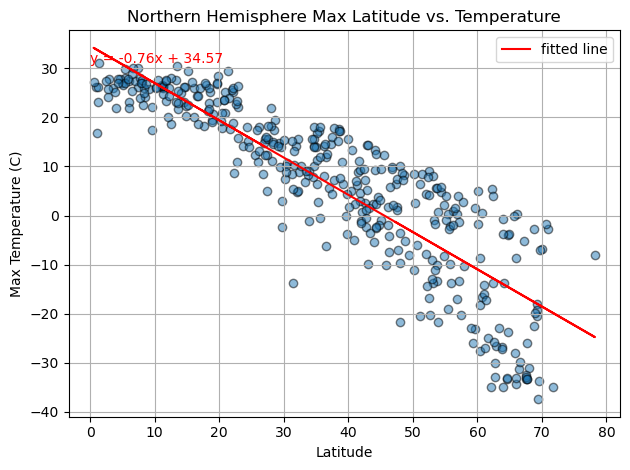

The r-value is: 0.7677188449329958


In [ ]:
# Linear regression on Northern Hemisphere

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], alpha=0.5, edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Plot the regression line
plt.plot(northern_hemi_df['Lat'], intercept + slope * northern_hemi_df['Lat'], 'r', label='fitted line')

# Add the equation of the line to the plot
plt.text(0, northern_hemi_df['Max Temp'].max(), f'y = {slope:.2f}x + {intercept:.2f}', color='red')

plt.grid(True)
plt.title("Northern Hemisphere Max Latitude vs. Temperature")
plt.tight_layout()
plt.legend()

# Show plot
plt.show()

# Print the r-value
print(f'The r-value is: {r_value**2}')


The r-value is: 0.18448385187999364


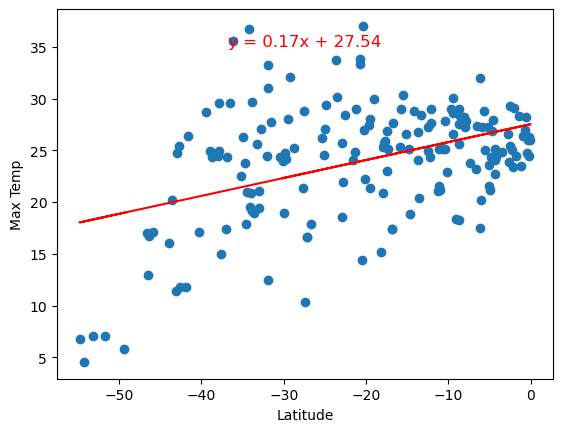

In [ ]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp')

**Discussion about the linear relationship:**  Northern Hemisphere, as latitude increase the  
Max Temp decreases however in Souther Hemisphere, the higher the Latitute the Max Temp also increase.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.16043863590471338


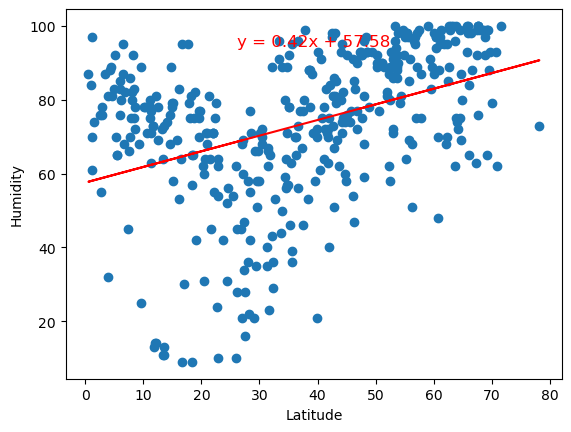

In [ ]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity')


The r-value is: 0.2241801034038259


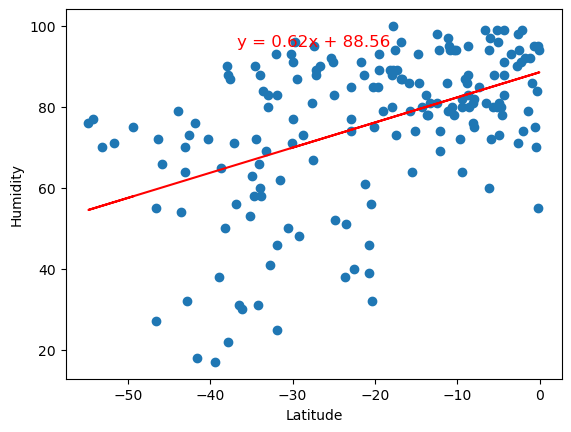

In [ ]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity')

**Discussion about the linear relationship:** In both Northern Hemisphere and Souther Hemisphere, when Latitude increse , Humidity starts incresing too. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.055758145154440095


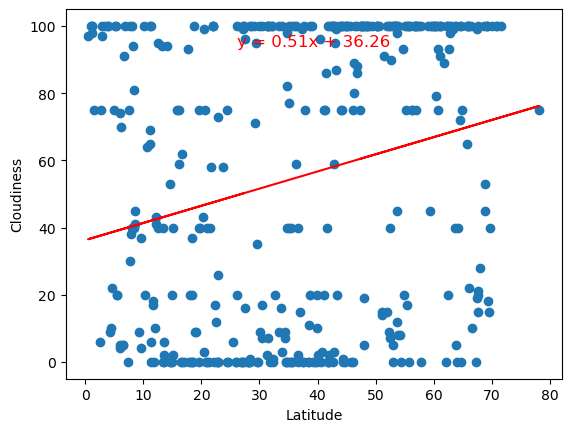

In [ ]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

The r-value is: 0.2186814873901126


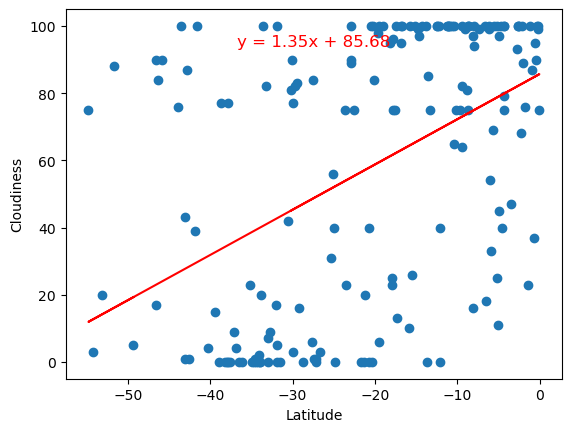

In [ ]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** In both hemispheres, when Latitude increase  Cloudiness starts increasing too. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.01696333378655721


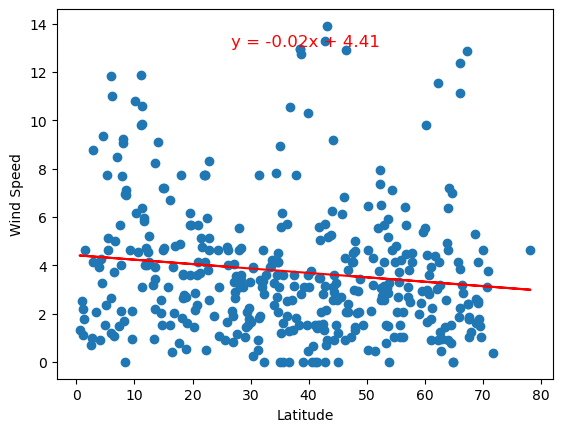

In [ ]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

The r-value is: 0.0816130955824161


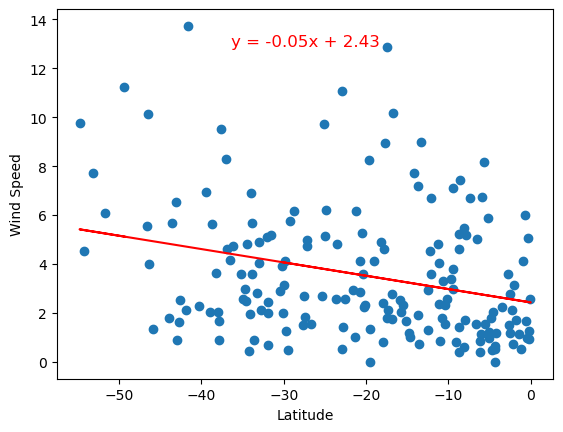

In [ ]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** In both hemispher when latitude increse , wind spead start increasing too. 